In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [22]:
data = pd.read_csv('car_evaluation.csv')
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [23]:
data['class'] = data['class'].apply(lambda x: 'safe' if x in ['good', 'vgood'] else 'not_safe')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [25]:
data = pd.get_dummies(data, columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   class           1727 non-null   object
 1   buying_high     1727 non-null   bool  
 2   buying_low      1727 non-null   bool  
 3   buying_med      1727 non-null   bool  
 4   buying_vhigh    1727 non-null   bool  
 5   maint_high      1727 non-null   bool  
 6   maint_low       1727 non-null   bool  
 7   maint_med       1727 non-null   bool  
 8   maint_vhigh     1727 non-null   bool  
 9   doors_2         1727 non-null   bool  
 10  doors_3         1727 non-null   bool  
 11  doors_4         1727 non-null   bool  
 12  doors_5more     1727 non-null   bool  
 13  persons_2       1727 non-null   bool  
 14  persons_4       1727 non-null   bool  
 15  persons_more    1727 non-null   bool  
 16  lug_boot_big    1727 non-null   bool  
 17  lug_boot_med    1727 non-null   bool  
 18  lug_boot

In [27]:
data.head()

,class,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,not_safe,False,False,False,True,False,False,False,True,True,...,False,True,False,False,False,False,True,False,False,True
1,not_safe,False,False,False,True,False,False,False,True,True,...,False,True,False,False,False,False,True,True,False,False
2,not_safe,False,False,False,True,False,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
3,not_safe,False,False,False,True,False,False,False,True,True,...,False,True,False,False,False,True,False,False,False,True
4,not_safe,False,False,False,True,False,False,False,True,True,...,False,True,False,False,False,True,False,True,False,False


In [28]:
X = data.drop('class', axis=1)
y = data['class']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [32]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute precision
precision = precision_score(y_test, y_pred, pos_label='safe')

# Compute recall
recall = recall_score(y_test, y_pred, pos_label='safe')

# Compute F1 score
f1 = f1_score(y_test, y_pred, pos_label='safe')

# Print the evaluation metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Confusion Matrix:
[[312   2]
 [  4  28]]
Accuracy: 0.9826589595375722
Precision: 0.9333333333333333
Recall: 0.875
F1 Score: 0.9032258064516129


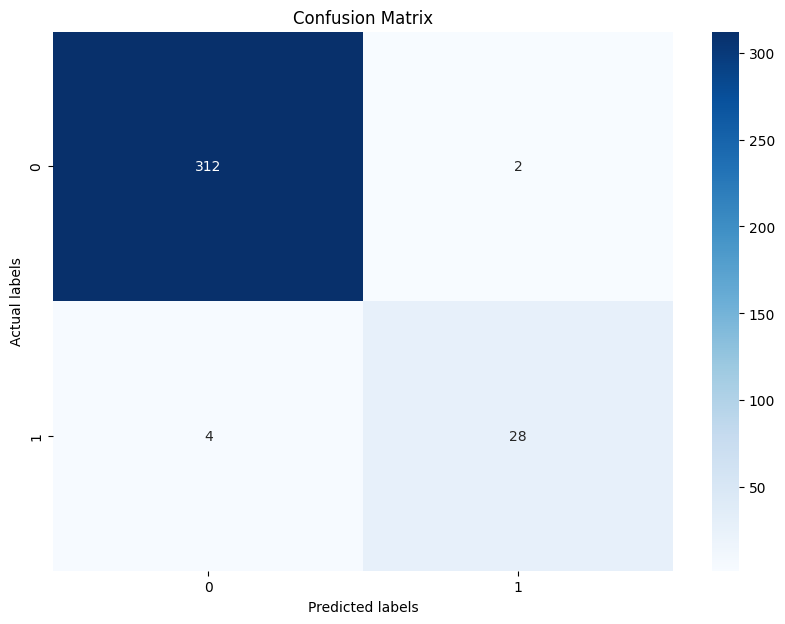

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()